In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [78]:
import pandas as pd

# Load both files
X = pd.read_csv('values.csv')
y = pd.read_csv('labels.csv')

# Preview
print("X shape:", X.shape)
print("y shape:", y.shape)

# Combine into one DataFrame
df = pd.concat([X, y], axis=1)
print("Combined DataFrame shape:", df.shape)
print(df.columns.tolist())
df.head()


X shape: (180, 14)
y shape: (180, 2)
Combined DataFrame shape: (180, 16)
['patient_id', 'slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'patient_id', 'heart_disease_present']


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


In [79]:
print(df.dtypes)
print(df.isnull().sum())

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
patient_id                               object
heart_disease_present                     int64
dtype: object
patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_majo

In [80]:
print(df.describe())

       slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         180.000000              180.000000   
mean                            1.550000              131.311111   
std                             0.618838               17.010443   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             1.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              180.000000   

       chest_pain_type  num_major_vessels  \
count       180.000000         180.000000   
mean          3.155556           0.694444   
std           0.938454           0.969347   
min           1.000000           0.000000   
25%           3.000000           0.000000   
50%           3.000000           0.000000   
75%           4.000000           1.000000   
max           4.000000     

C:\Users\mahesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


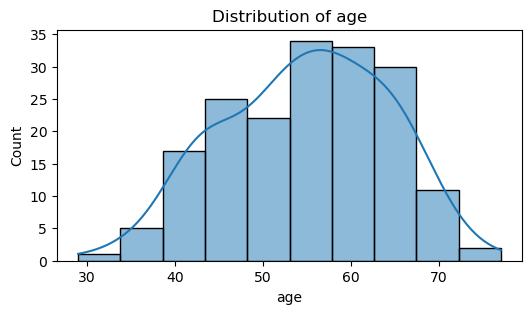

C:\Users\mahesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


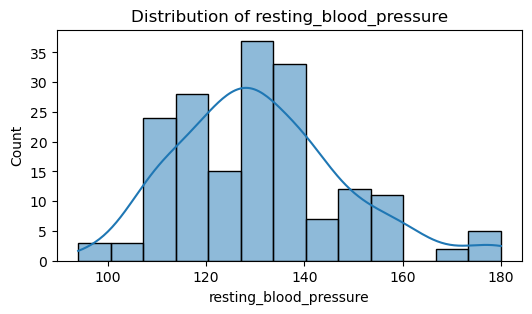

C:\Users\mahesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


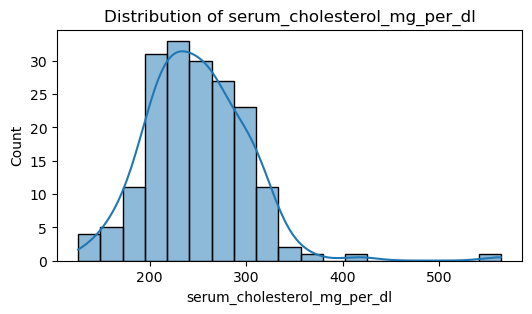

C:\Users\mahesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


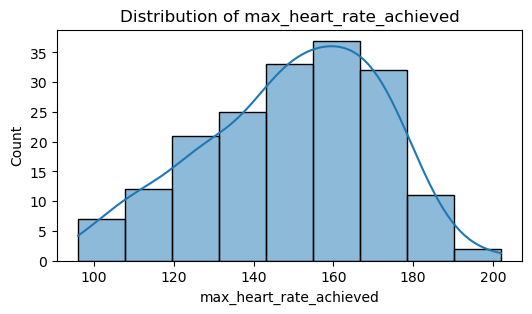

C:\Users\mahesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


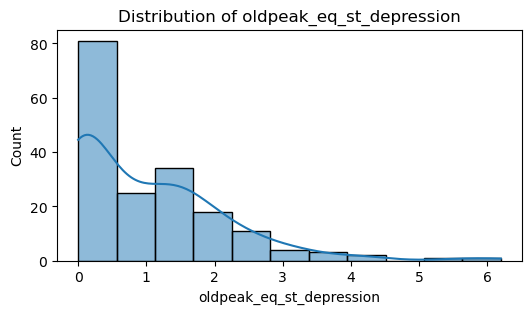

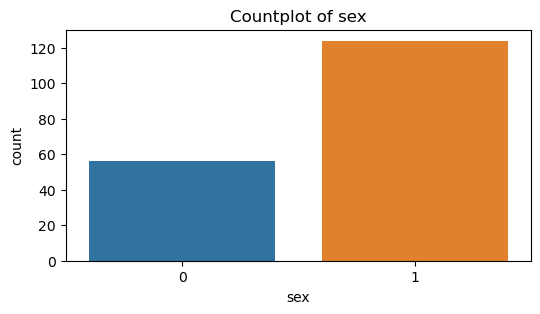

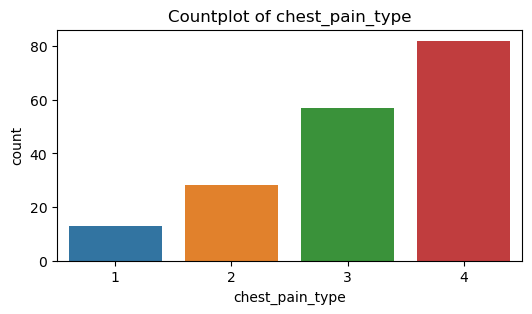

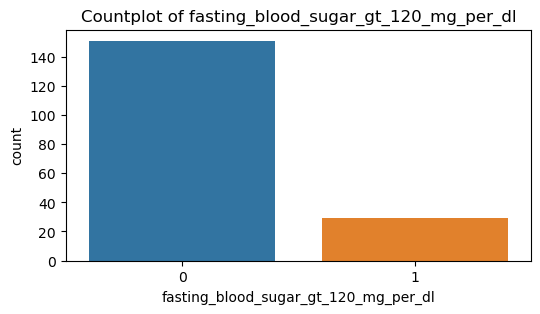

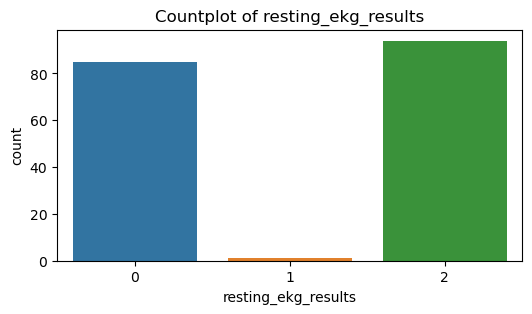

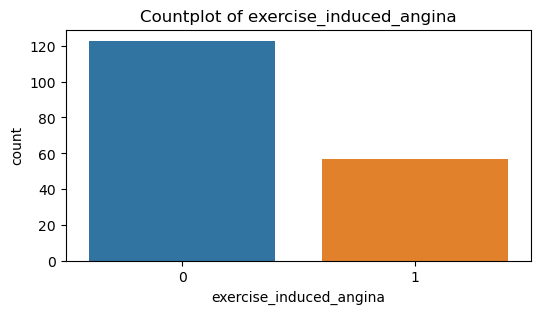

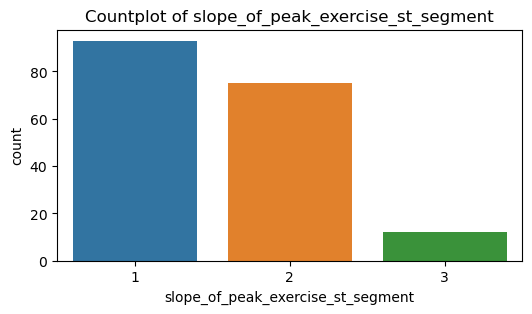

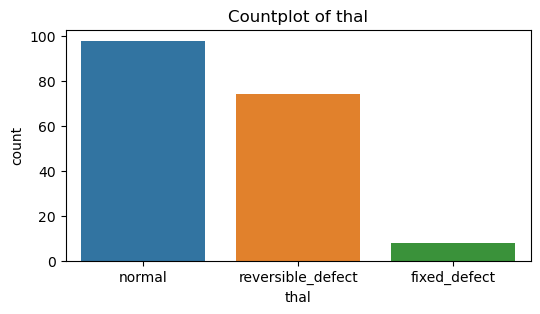

ValueError: could not convert string to float: '0z64un'

<Figure size 1000x800 with 0 Axes>

In [81]:
# Univariate plots
num_cols = ['age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved', 'oldpeak_eq_st_depression']
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Countplots for categoricals
cat_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
            'exercise_induced_angina', 'slope_of_peak_exercise_st_segment', 'thal']
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [82]:
# Encode categorical feature 'thal'
df.columns = df.columns.str.strip()
df['thal'] = LabelEncoder().fit_transform(df['thal'])

# Drop patient_id if present
if 'patient_id' in df.columns:
    df.drop('patient_id', axis=1, inplace=True)

# Split features & target
X = df.drop('heart_disease_present', axis=1)
y = df['heart_disease_present']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Try multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    acc = model.score(X_test, y_test)
    roc = roc_auc_score(y_test, y_proba)
    print(f"\n{name} Report:\n", classification_report(y_test, y_pred))
    results.append((name, acc, roc))

# Model comparison DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC"])
print(results_df.sort_values(by="ROC AUC", ascending=False))



Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.67      0.88      0.76        16
           1       0.87      0.65      0.74        20

    accuracy                           0.75        36
   macro avg       0.77      0.76      0.75        36
weighted avg       0.78      0.75      0.75        36


Random Forest Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83       